In [78]:
# Imports 
import pandas as pd 
from sklearn import tree
from sklearn import datasets 
from matplotlib import pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


In [5]:
# Load the iris dataset
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [21]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
# Create pandas dataframe from iris dataset
iris_data = iris['data']
iris_target = iris['target']
dataset = pd.DataFrame(iris_data, columns=iris.feature_names)
dataset['class'] = iris.target


In [28]:
# Get some info
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
# General dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [70]:
# Numerical info
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [30]:
# Count the number of class avilable 
dataset.value_counts('class')

class
0    50
1    50
2    50
dtype: int64

In [47]:
# Extract the dependant and independant variables 
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [48]:
# Scale the values of X so that all values will be in the same scale 
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [71]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [80]:
# Train Decision Tree Classifier 
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
predictions = tree_clf.predict(X_train)

In [81]:
# Make prediction
y_pred = tree_clf.predict(X_test)

In [82]:
# Check the performance of the model using confusion matrix, f1 score, recall and precision
conf = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')

In [83]:
print(f'f1-score: {f1}  |   recall: {recall}   |   precision: {precision}')

f1-score: 1.0  |   recall: 1.0   |   precision: 1.0


In [84]:
# Make random Prediction
random_flower = [X_test[12]]
random_flower_class = y_test[12]
random_flower_class = iris.target_names[random_flower_class]
random_flower_class


'setosa'

In [85]:
prediction = tree_clf.predict(random_flower)
prediction = list(prediction)
iris.target_names[prediction[0]]

'setosa'

In [91]:
# Visualize our tree
tree_representation = tree.export_text(tree_clf)
print(tree_representation)


|--- feature_2 <= -0.74
|   |--- class: 0
|--- feature_2 >  -0.74
|   |--- feature_2 <= 0.56
|   |   |--- feature_3 <= 0.59
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.59
|   |   |   |--- class: 2
|   |--- feature_2 >  0.56
|   |   |--- feature_3 <= 0.72
|   |   |   |--- feature_2 <= 0.68
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  0.68
|   |   |   |   |--- feature_3 <= 0.46
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  0.46
|   |   |   |   |   |--- feature_2 <= 0.96
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  0.96
|   |   |   |   |   |   |--- class: 2
|   |   |--- feature_3 >  0.72
|   |   |   |--- feature_2 <= 0.62
|   |   |   |   |--- feature_1 <= 0.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  0.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  0.62
|   |   |   |   |--- class: 2



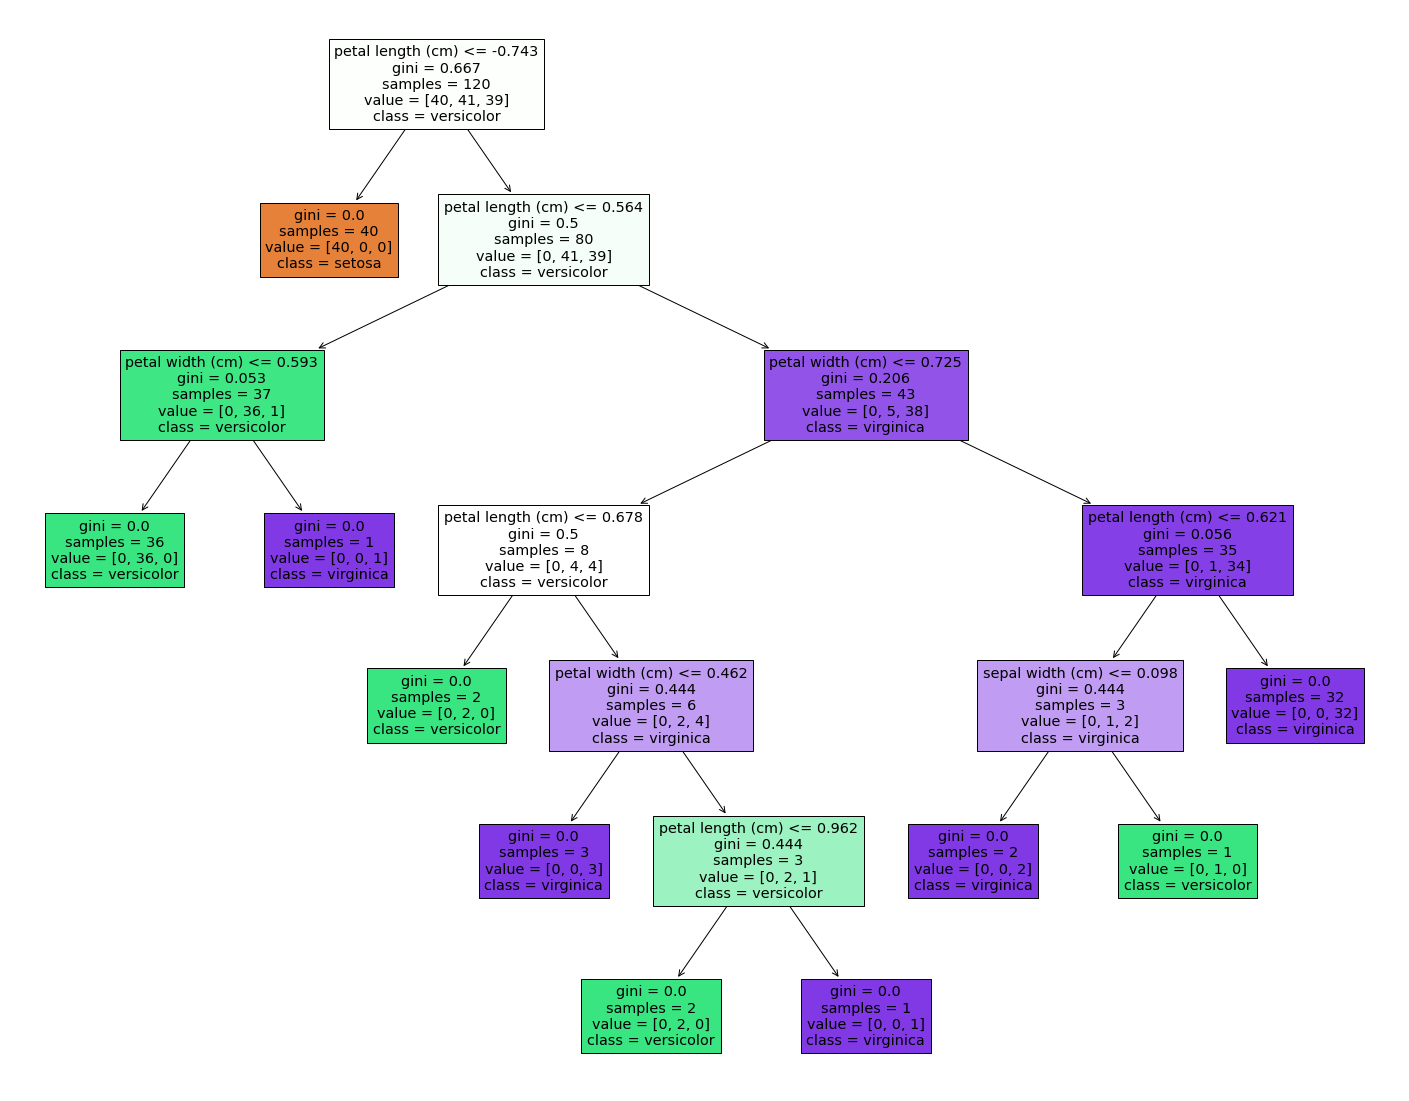

In [89]:
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(tree_clf,
                    feature_names=iris.feature_names,
                    class_names=iris.target_names,
                    filled=True)
plt.show()
fig.savefig('./images/iris_tree.png')